#### Model Evaluation and Hyperparameter

Hyperparameter are "higher-level" free parameters.
- Depth (number of hidden layers)
- Width (number of hidden neurons in a hidden layer)
- Activation function (choice of nonlinearity in non-input nodes)
- Regularization parameter (way to trade off simplicity vs. fit to the data)

In [ ]:
Recall

A predictor obtained by training the free parameters of the considered model using the available annotated data.


#### How to Choose a Model

It is not to evaluate if a chosen model is good or not (performs well in training and in real practice

We use validation methods (validation set):
- Holdout validation
- Cross-validation
- Leave-one-out validation

##### Holdout Validation
- Randomly choose 30% of data to form a validaton set
- Remaining data forms the training set
- Estimate the test performance on the validation set against all candidate models
    - Regression: Compute the cost function (such MSE) on the validation set (instead of the training set)
    - Classification: Compute the 0 - error metric:
    $$ \frac{number of wrong predictions}{number of predictions} = 1 - Accuracy $$
- Choose the model with the lowest validation error (such as lowest MSE)
- Re-train with chosen model on joined training and validation to obtain predictor
- Estimate future performance of the obtained predictor on test set
- Ready to deploy with the predictor

##### k-Fold Cross-Validation

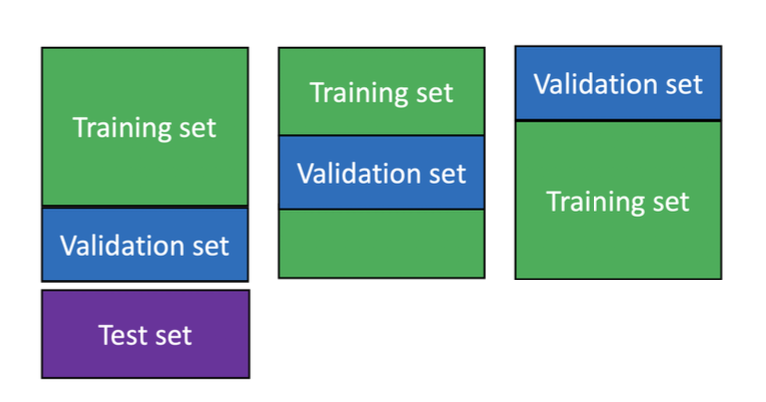

- Split the training set randomly into k (equal-sized) disjoint sets
- Use k - 1 of those together for training
- Use the remaining one for validation
- Permuate the k sets and repeat k times
- Average the performances on k validation sets
  - Take the mean of all k errors: $MSE_3fold = 2.05$
- Repeat for all candidate models
- Choose the model with the smallest average 3-fold cross validation error.
- Re-train with chose model on joined training and validation to obtain the predictor
- Estimate future performance of the obtained predictor on test set
- Deploy the predictor in real-world

##### Leave-one-out Validation

- Leave a single example for validation, and train on all the rest of the annotated data
- For a total of N examples, repeat this N times, each time leaving out a single example
- Take the average of the validation errors as measured on the left-out points
- Same as N-fold cross-validation where N is the number of labelled points

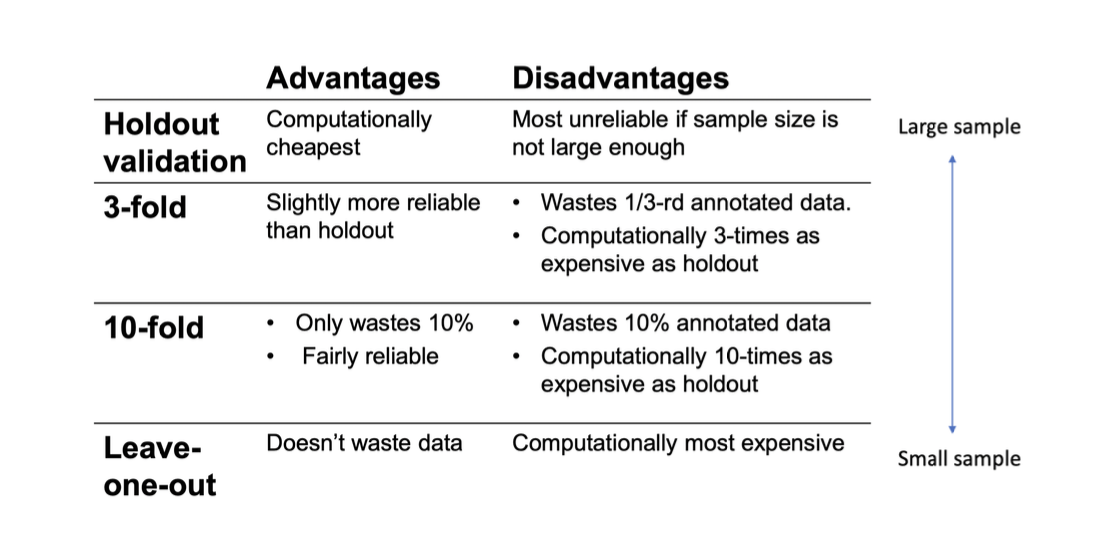

